## Рынок заведений общественного питания Москвы
Оригинальное кафе — гостей должны обслуживать роботы. Проект многообещающий, но дорогой.


Цель работы - описать текущее положение дел на рынке.
Подготовить исследование рынка.

##### Открытые данные о заведениях общественного питания в Москве:
Таблица rest_data:
- object_name — название объекта общественного питания;
- chain — сетевой ресторан;
- object_type — тип объекта общественного питания;
- address — адрес;
- number — количество посадочных мест.


##### Оглавление
1. <a href='#Предобработка данных'>Предобработка данных</a>
2. <a href='#Анализ данных'>Анализ данных</a>
3. <a href='#Выводы '>Выводы </a>   
    


#### Презентация: <https://drive.google.com/file/d/198FtLJqUxJUlsHuVOyjYK8jckFHDswTM/view?usp=sharing>

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import BytesIO
import requests
import re
import warnings
import math

### 1. Предобработка данных
<a id='Предобработка данных'></a>

In [2]:
rest = pd.read_csv('/datasets/rest_data.csv')
rest.head(10)

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
5,27429,СТОЛ. ПРИ ГОУ СОШ № 1051,нет,столовая,"город Москва, Абрамцевская улица, дом 15, корп...",240
6,148815,Брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
7,20957,Буфет МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",90
8,20958,КПФ СЕМЬЯ-1,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",150
9,28858,Столовая МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",120


In [3]:
rest['object_name'] = rest['object_name'].str.lower()
rest['object_type'] = rest['object_type'].replace('предприятие быстрого обслуживания', 'ПБО')
rest['object_type'] = rest['object_type'].replace('магазин (отдел кулинарии)', 'кулинария')

In [4]:
print(rest['address'].duplicated().sum())
rest[rest.duplicated(subset=['address', 'object_name']) == True]

6258


,id,object_name,chain,object_type,address,number
114,28613,комбинат питания мгту им.н.э.баумана,нет,закусочная,"город Москва, Бригадирский переулок, дом 3-5",216
115,28614,комбинат питания мгту им.н.э.баумана,нет,буфет,"город Москва, Бригадирский переулок, дом 3-5",12
579,149227,общественное питание,нет,столовая,"город Москва, Павелецкая площадь, дом 1",70
580,149205,общественное питание,нет,кафе,"город Москва, Павелецкая площадь, дом 1",35
581,149131,общественное питание,нет,кафе,"город Москва, Павелецкая площадь, дом 1",39
...,...,...,...,...,...,...
15217,214146,макдоналдс,да,ПБО,"город Москва, Кировоградская улица, дом 13А",0
15241,210885,kfc,да,ПБО,"город Москва, Манежная площадь, дом 1, строение 2",41
15253,214872,чайхона №1,да,кафе,"город Москва, Кутузовский проспект, дом 57",0
15363,209186,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20


In [5]:
rest.loc[(rest.duplicated(subset=['address', 'object_name'])==True)] = rest.loc[(rest.duplicated(subset=['address', 'object_name'])==True)].drop_duplicates(inplace = True)
rest = rest.dropna()
rest.info()

warnings.filterwarnings("ignore")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15141 entries, 0 to 15364
Data columns (total 6 columns):
id             15141 non-null float64
object_name    15141 non-null object
chain          15141 non-null object
object_type    15141 non-null object
address        15141 non-null object
number         15141 non-null float64
dtypes: float64(2), object(4)
memory usage: 828.0+ KB


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [6]:
rest['adresss1']=rest['address'].str.split(', ').str.get(0)
rest['adresss2']=rest['address'].str.split(', ').str.get(1)

In [7]:
rest['street'] = 1

In [8]:
rest.loc[rest['adresss1']== "город Москва", 'street'] = rest.loc[rest['adresss1']== "город Москва", 'adresss2']
rest.loc[rest['adresss1']!= "город Москва", 'street'] = rest.loc[rest['adresss1']!= "город Москва", 'adresss1']
rest['street'].value_counts()

город Зеленоград             230
проспект Мира                196
Профсоюзная улица            180
Ленинградский проспект       171
Пресненская набережная       165
                            ... 
Малый Саввинский переулок      1
Красногвардейский бульвар      1
3-й Лучевой просек             1
1-й Саратовский проезд         1
Нарвская улица                 1
Name: street, Length: 1854, dtype: int64

В данных нет пропусков. 
При использовании метода duplicated() на данных 'address' и 'object_name' обнаружено 225 дубликатов, которые удалены методом drop_duplicates().
Данные в графе "object_name" переведены в нижний регистр, поскольку есть большое количество одинаковых названий, написанных разным способом. 

Названия "object_type" заменены:
- 'предприятие быстрого обслуживания' на 'ПБО'
- 'магазин (отдел кулинарии)' на 'кулинария',
чтобы громоздкие названия не мешались на графиках.

При этом различные написания кафе (например кафе "шоколадница" и "шоколадница") не будут считаться одним и тем же заведением, поскольку это могут быть заведения разных владельцев франшизы. 

Так же для дальнейшего анализа введен новые столбец - данные об улице, на которой расположено заведение.

В данных об адресе есть некоторые различия в заполнении - это делает их не очень удобными для анализа. Поэтому в графу 'street' попадают поселения Новой Москвы, микрорайоны и другий образования внутри города Москвы. 

### 2. Анализ данных
<a id='Анализ данных'></a>

#### 2.1 Соотношение видов объектов общественного питания по количеству. 

In [9]:
type_total = rest.groupby('object_type').agg({'id' : 'count'}).sort_values(by='id', ascending = False)
type_total.columns = ['id_count']

Text(0, 0.5, 'Количесвто заведений')

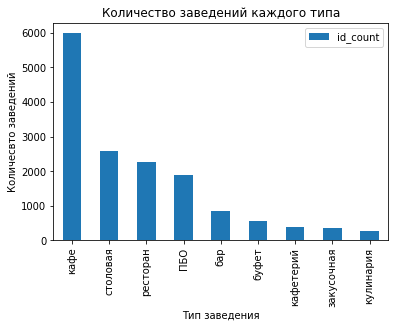

In [10]:
type_total.plot(kind='bar')
plt.title('Количество заведений каждого типа')
plt.xlabel("Тип заведения")
plt.ylabel("Количесвто заведений")

Большая часть заведений общественного питания относится к типу "кафе". Далее идут "столовая", "ресторан", "предприятие быстрого обслуживания". 

#### 2.2 Соотношение сетевых и несетевых заведений по количеству.

Несетевых заведений в 4.16 раза больше, чем сетевых


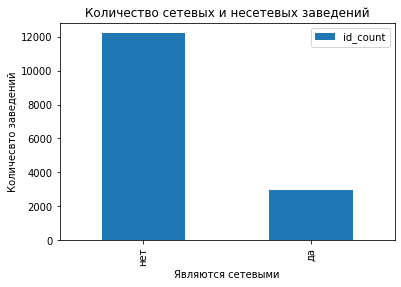

In [11]:
is_chain = rest.groupby('chain').agg({'id' : 'count'}).sort_values(by='id', ascending = False)
is_chain.columns= ['id_count']
is_chain.plot(kind='bar')
plt.title('Количество сетевых и несетевых заведений')
plt.xlabel("Являются сетевыми")
plt.ylabel("Количесвто заведений")
print('Несетевых заведений в {:.2f} раза больше, чем сетевых'.format(is_chain['id_count'][0]/is_chain['id_count'][1]))

#### 2.3 Вид объекта общественного питания, для которого характерно сетевое распространение

In [12]:
type_chain_count = rest.groupby(['object_type', 'chain']).agg({'id':'count'}).reset_index()
common_type = type_chain_count.query('chain == "да"').merge(type_chain_count.query('chain == "нет"'), on = 'object_type')

Text(0, 0.5, '% сетевых заведений')

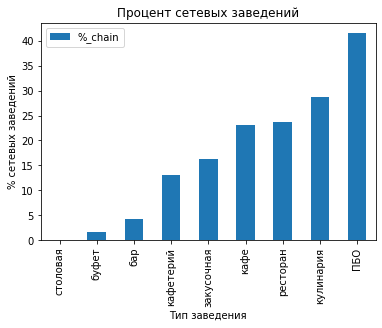

In [13]:
common_type['%_chain'] = 100 * common_type['id_x']/(common_type['id_x'] + common_type['id_y'])
common_type.sort_values(by='%_chain').plot('object_type', '%_chain', kind = 'bar')
plt.title('Процент сетевых заведений')
plt.xlabel("Тип заведения")
plt.ylabel("% сетевых заведений")

Чаще всего сетевыми являются предприятия быстрого обслуживания и магазин(отдел кулинария). Реже всего - столовая, буфет и бар (доля сетевых заведений не превышает 5%. 

#### 2.4 Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

In [14]:
chain_rest = rest.query('chain == "да"')

In [15]:
chain_rest_group = chain_rest.groupby('object_name').agg({'id':'count', 'number': 'median'}).sort_values(by = 'id', ascending = False)
chain_rest_group.head(5)

,id,number
object_name,,
шоколадница,154,50.0
kfc,152,45.0
макдоналдс,147,79.0
бургер кинг,136,45.0
теремок,93,24.0


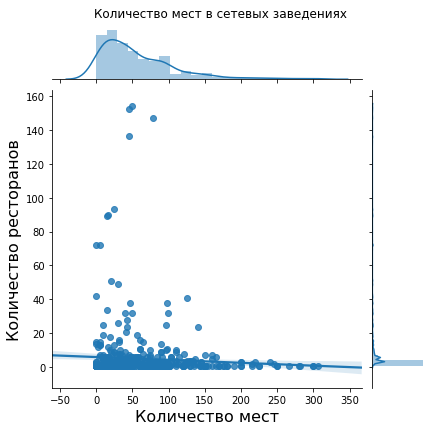

In [16]:
h = sns.jointplot(x="number", y="id", data=chain_rest_group, kind='reg')
h.set_axis_labels('Количество мест', 'Количество ресторанов', fontsize=16)
h.fig.subplots_adjust(top=0.93)
h.fig.suptitle('Количество мест в сетевых заведениях')
plt.show()

Text(0, 0.5, 'Частота')

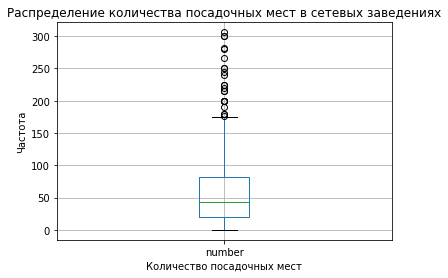

In [17]:
chain_rest_group.boxplot('number')
plt.title('Распределение количества посадочных мест в сетевых заведениях')
plt.xlabel("Количество посадочных мест")
plt.ylabel("Частота")

In [18]:
print('Медиана количества посадочных мест во всех типах сетевых заведений', chain_rest_group['number'].median())
print('Квантили распределения посадочных мест во всех типах сетевых заведений:', chain_rest_group['number'].quantile([0.25, 0.75, 0.95]))
print('Медиана количества посадочных мест в заведениях типа кафе',chain_rest.query('object_type == "кафе"')['number'].median())

Медиана количества посадочных мест во всех типах сетевых заведений 43.0
Квантили распределения посадочных мест во всех типах сетевых заведений: 0.25     20.000
0.75     82.375
0.95    160.000
Name: number, dtype: float64
Медиана количества посадочных мест в заведениях типа кафе 40.0


Text(0, 0.5, 'Частота')

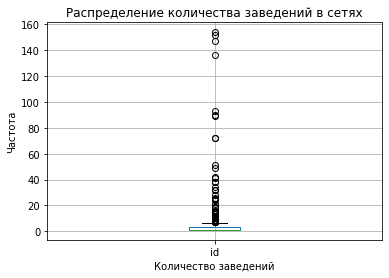

In [19]:
chain_rest_group.boxplot('id')
plt.title('Распределение количества заведений в сетях')
plt.xlabel("Количество заведений")
plt.ylabel("Частота")

In [20]:
print('95% распределения количества заведений в сети во всех типах сетевых заведений:', chain_rest_group['id'].quantile(0.95))

95% распределения количества заведений в сети во всех типах сетевых заведений: 16.5


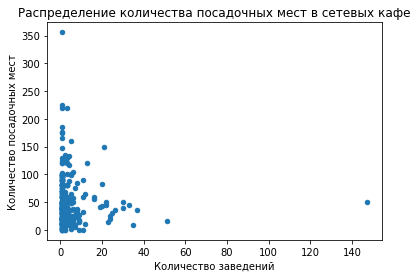

Среднее количество заведений типа кафе в сети 4.03
Медиана количества заведений типа кафе в сети 1.00


In [21]:
cafe_group = chain_rest.groupby(['object_type', 'object_name']).agg({
    'id': 'count', 
    'number': 'median'
}).sort_values(by= 'id', ascending = False).reset_index().query('object_type == "кафе"')

cafe_group.plot(x = 'id', y = 'number', kind = 'scatter')
plt.title('Распределение количества посадочных мест в сетевых кафе')
plt.xlabel("Количество заведений")
plt.ylabel("Количество посадочных мест")
plt.show()

print('Среднее количество заведений типа кафе в сети {:.2f}'.format(cafe_group['id'].mean()))
print('Медиана количества заведений типа кафе в сети {:.2f}'.format(cafe_group['id'].median()))

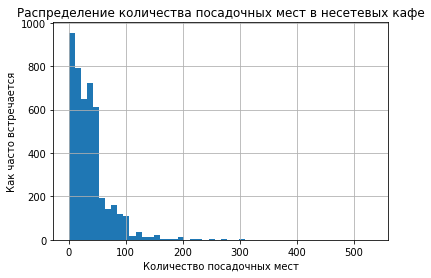

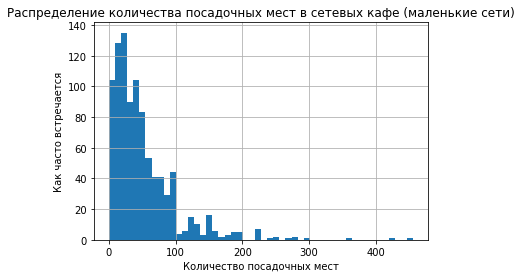

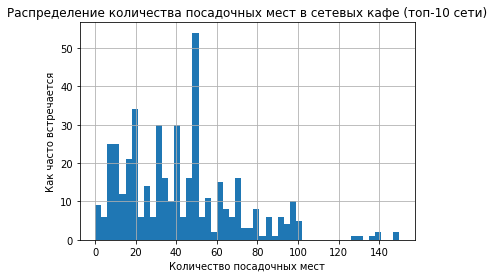

Медиана количества посадочных мест в заведении типа несетевое кафе 30.0
Медиана количества посадочных мест в заведении типа сетевое кафе (маленькие сети) 40.0
Медиана количества посадочных мест в заведении типа сетевое кафе (топ-10) 40.0
Среднее количество заведений типа кафе в большой сети 43.80
Медиана количества заведений типа кафе в большой сети 31.50
Среднее количество заведений типа кафе в сети 2.83
Медиана количества заведений типа кафе в сети 1.00


In [22]:
cafe_top_10 = cafe_group.head(10)['object_name'].unique() # выделим топ-10 кафе сетей по количеству заведений
chain_cafe = rest.query('object_name not in @cafe_top_10 and object_type == "кафе" and chain =="да"')
not_chain_cafe = rest.query('object_name not in @cafe_top_10 and object_type == "кафе" and chain =="нет"')
big_chain_cafe = rest.query('object_name.isin(@cafe_top_10) == True  and object_type == "кафе" and chain =="да"')

not_chain_cafe.hist('number', bins = 50)
plt.title('Распределение количества посадочных мест в несетевых кафе')
plt.xlabel("Количество посадочных мест")
plt.ylabel("Как часто встречается")
plt.show()

chain_cafe.hist('number', bins = 50)
plt.title('Распределение количества посадочных мест в сетевых кафе (маленькие сети)')
plt.xlabel("Количество посадочных мест")
plt.ylabel("Как часто встречается")
plt.show()


big_chain_cafe.hist('number', bins = 50)
plt.title('Распределение количества посадочных мест в сетевых кафе (топ-10 сети)')
plt.xlabel("Количество посадочных мест")
plt.ylabel("Как часто встречается")
plt.show()

print('Медиана количества посадочных мест в заведении типа несетевое кафе', not_chain_cafe['number'].median())
print('Медиана количества посадочных мест в заведении типа сетевое кафе (маленькие сети)', chain_cafe['number'].median())
print('Медиана количества посадочных мест в заведении типа сетевое кафе (топ-10)', big_chain_cafe['number'].median())

big_chain_cafe_group = big_chain_cafe.groupby('object_name').agg({
    'id': 'count', 
    'number': 'median'
}).sort_values(by= 'id', ascending = False).reset_index()

chain_cafe_group = chain_cafe.groupby('object_name').agg({
    'id': 'count', 
    'number': 'median'
}).sort_values(by= 'id', ascending = False).reset_index()

print('Среднее количество заведений типа кафе в большой сети {:.2f}'.format(big_chain_cafe_group['id'].mean()))
print('Медиана количества заведений типа кафе в большой сети {:.2f}'.format(big_chain_cafe_group['id'].median()))

print('Среднее количество заведений типа кафе в сети {:.2f}'.format(chain_cafe_group['id'].mean()))
print('Медиана количества заведений типа кафе в сети {:.2f}'.format(chain_cafe_group['id'].median()))

Для сетевых заведений характерно разное количество заведений (95% заведений имеют до 17 заведений в сети). Медиана количества посадочных мест во всех типах сетевых заведений 43.
При этом если рассматривать сетевые кафе, то разброс значений будет меньше. 
Если взять сетевые кафе, принадлежащие большим сетям, то среднее количество заведений в сети равно 43.8, количество мест - 40.
Сетевые кафе маленьких сетей имеют тоже количество посадочных мест в среднем, но среднее количество заведений составляет 2.8. 

#### 2.5 Среднее количество посадочных мест.

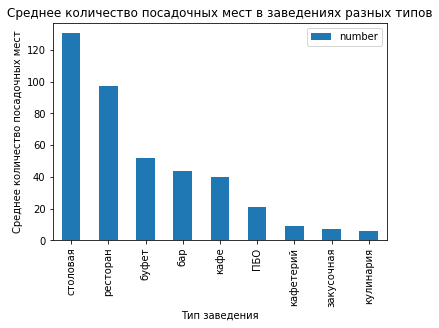

,object_type,number
8,столовая,130.457621
7,ресторан,97.128137
2,буфет,51.660177
1,бар,43.660777
4,кафе,39.915707
0,ПБО,20.743767
5,кафетерий,9.155612
3,закусочная,6.904070
6,кулинария,5.610294


In [23]:
number_type = rest.groupby(['object_type']).agg({'number': 'mean'}).reset_index().sort_values(by = 'number', ascending = False)
number_type.plot(x = 'object_type', y = 'number', kind = 'bar')
plt.title('Среднее количество посадочных мест в заведениях разных типов')
plt.xlabel("Тип заведения")
plt.ylabel("Среднее количество посадочных мест")
plt.show()
display(number_type)

В среднем больше всего мест для посетителей отведено в столовых (среднее количество мест - 130). А меньше всего - в закусочных и магазинах (отдел кулинарии) - среднее количествво мест 6.9 и 5.6 соответственно. 

#### 2.6 Топ-10 улиц по количеству объектов общественного питания

In [24]:
#https://docs.google.com/spreadsheets/d/1BDWfMGkX0UMuvdmcRhhpo3RDZctQDEDWpuV9fcJT7eA/edit?usp=sharing
spreadsheet_id = '1BDWfMGkX0UMuvdmcRhhpo3RDZctQDEDWpuV9fcJT7eA'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
df = pd.read_csv(BytesIO(r.content))
df.columns= ['street', 'estate_code']
df = df.groupby('street').agg({'estate_code': 'first'}).reset_index()

In [25]:
rest_location = pd.merge(rest, df, on = 'street', how = 'left')
rest_location.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15141 entries, 0 to 15140
Data columns (total 10 columns):
id             15141 non-null float64
object_name    15141 non-null object
chain          15141 non-null object
object_type    15141 non-null object
address        15141 non-null object
number         15141 non-null float64
adresss1       15141 non-null object
adresss2       15141 non-null object
street         15141 non-null object
estate_code    15139 non-null object
dtypes: float64(2), object(8)
memory usage: 1.3+ MB


In [26]:
top_10 = rest_location.groupby('street').agg({
    'id': 'count', 
    'estate_code' : 'first' 
}).sort_values(by='id', ascending= False).query('street != "город Зеленоград" and street != "поселение Сосенское"').head(10).reset_index()
top_10.columns = ['street', 'id_count', 'estate_code']
display(top_10)

,street,id_count,estate_code
0,проспект Мира,196,0105;0301;0309;0310;0312;0313;0317
1,Профсоюзная улица,180,0701;0704;0707;0709;0710;0712
2,Ленинградский проспект,171,0201;0202;0214;0217
3,Пресненская набережная,165,106
4,Варшавское шоссе,160,0610;0613;0615;0619;0620;0621;0708;0711;1111
5,Ленинский проспект,148,0110;0610;0702;0706;0707;0709;0814;0817
6,проспект Вернадского,126,0702;0706;0814;0815;0817
7,Кутузовский проспект,112,0805;0819
8,Каширское шоссе,110,0612;0613;0616;0617
9,Кировоградская улица,106,0619;0620;0621


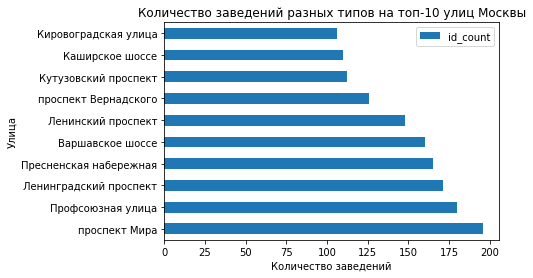

In [27]:
top_10.plot('street', 'id_count', kind = 'barh')
plt.title('Количество заведений разных типов на топ-10 улиц Москвы')
plt.xlabel("Количество заведений")
plt.ylabel("Улица")
plt.show()

Все улицы принадлежат разным районам. Но: в топ-10 по количеству заведений попали не простые улицы:
- Варшавское шоссе - прямое шоссе с наибольшей протяженностью, которое раскинулась на 22,5 км и имеет важное транспортное значение. Шоссе проходит через 8 районов, размещенных в трех административных округах.
- Ленинский проспект состоит из большой Калужской улицы, частично из одноименного шоссе и Киевского шоссе. Месторасположение объекта охватывает 4 округа (Западный, Южный, Западно-Южный и Центральный). Берет свое начало автомагистраль от Калужской площади, заканчивается возле МКАД и имеет протяженность 14 км, ширину от 108 до 120 м. Это единственная в столице России радиальная автомагистраль, не меняющая название на всей дистанции.
- Ленинградский проспект (Ленинградка) размещается в Северном административном округе, держит первенство в статусе самой широкой улицы Москвы (120м)
- Проспект Мира одна из самых протяженных и оживленных улиц города Москвы. 
- Профсоюзная улица является одной из главных магистралей юго-запада Москвы. От метро Коньково до пересечения с улицей Академика Капицы она также выступает в качестве границы между районами Коньково и Тёплый Стан.
- Пресненская набережная проходит вдоль делового центра Москва-Сити - крупный развивающийся деловой район в Москве.
        
        
Каждая улица проходит через несколько районов и административных округов, это улицы с большой проходимостью (людей и транспорта) вполне логично, что на них собираются заведения общественного питания. При этом в основном это не улицы ЦАО (исключая Пресненскую набережную, но она обособлена за счет Москва-Сити).

#### 2.7 Улицы с одним объектом общественного питания.

In [28]:
#https://docs.google.com/spreadsheets/d/1jPv-rHHoDAgEG_ZZTd3ZizEIcjobQkN-_MOIycxOfkw/edit?usp=sharing
spread_id = '1jPv-rHHoDAgEG_ZZTd3ZizEIcjobQkN-_MOIycxOfkw'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spread_id)
r = requests.get(file_name)
code_omk_te = pd.read_csv(BytesIO(r.content))    
code_omk_te.columns = ['estate', 'first_estate_code']
code_omk_te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 2 columns):
estate               151 non-null object
first_estate_code    151 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.5+ KB


In [29]:
rest_location['first_estate_code'] =rest_location['estate_code'].str.split(';').str.get(0)
rest_location['first_estate_code'] = rest_location['first_estate_code'].fillna(0)
rest_location['first_estate_code'] = rest_location['first_estate_code'].astype(int)
rest_location= pd.merge(rest_location, code_omk_te, on = 'first_estate_code', how = 'left')
rest_location['state_code'] = (rest_location['first_estate_code']/100)
rest_location['state_code'] = rest_location['state_code'].astype(int)


In [30]:
#https://docs.google.com/spreadsheets/d/1iMn2w5Wl9v0fg_4luXpQLkpCeMJUXlbF2XZeRocLB_s/edit?usp=sharing
spread_id = '1iMn2w5Wl9v0fg_4luXpQLkpCeMJUXlbF2XZeRocLB_s'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spread_id)
r = requests.get(file_name)
state_code = pd.read_csv(BytesIO(r.content))    
state_code.columns = ['state', 'state_code']
state_code.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
state         12 non-null object
state_code    12 non-null int64
dtypes: int64(1), object(1)
memory usage: 320.0+ bytes


In [31]:
rest_location= pd.merge(rest_location, state_code, on = 'state_code', how = 'left')

In [32]:
street_witn_1 = rest_location.groupby('street').agg({'id': 'count'}).query('id == 1').reset_index()
list_street_witn_1 = street_witn_1['street'].unique()
print('Всего в данных {} улиц, на которых есть всего лишь 1 заведение общественного питания'.format(len(street_witn_1)))

Всего в данных 542 улиц, на которых есть всего лишь 1 заведение общественного питания


In [33]:
rest_alone = rest_location.query('street.isin(@list_street_witn_1)==True').groupby('street').agg({
    'id': 'count',  
    'estate_code': 'first',
    'estate': 'first',
    'state': 'first'
}).reset_index().groupby('estate_code').agg({'estate': 'first','state':'first','id': 'count'}).sort_values(by = 'id', ascending= False)
display(rest_alone.head(10))
rest_alone.groupby('state').agg({'id':'sum'}).sort_values(by='id', ascending= False)


,estate,state,id
estate_code,,,
107,муниципальный округ Таганский,ЦАО,26
102,муниципальный округ Басманный,ЦАО,24
109,муниципальный округ Хамовники,ЦАО,22
108,муниципальный округ Тверской,ЦАО,19
309,муниципальный округ Марьина Роща,СВАО,16
106,муниципальный округ Пресненский,ЦАО,15
418,муниципальный округ Сокольники,ВАО,15
103,муниципальный округ Замоскворечье,ЦАО,12
105,муниципальный округ Мещанский,ЦАО,12


,id
state,
ЦАО,176
ВАО,64
СВАО,64
ЮВАО,55
САО,53
ЗАО,45
ЮЗАО,28
СЗАО,27
ЮАО,23


По одному объекту общественного питания находятся на улицах многих районов и округов. Видно, что лидируют районы ЦАО - Таганский, Басманный, хамовники. 
Предпологаю две причины такого состояния:
- дорогая арендная плата 
- короткие улицы, для центра Москвы, особенно старый город и улицы вокруг Кремля - короткие, с узкими тротуарами. Нет возможности расширить помещения за счет улицы или перепланировки здания.
Плюс здания в центре Москвы не подлежат перепланировке и накладывается ряд ограничений на использование наружной рекламы - реклама не может нарушать внешний вид города. 
Поэтому же в центре больше всего кафе - эти предприятия не требуют больших помещений (нет необходимости в полноценной кухне), могут существовать с маленьким количеством посадочных мест, основным товаром является кофе, в том числе кофе на вынос - что удобно для районов с офисами. (Перед рабочим днем зайти и выпить кофе, или взять кофе с собой в офис)

#### 2.8 Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания.

0.90    143.0
0.95    180.0
0.99    300.0
Name: number, dtype: float64
1700.0
40.0


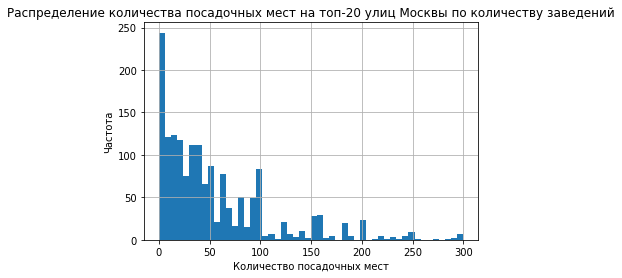

In [34]:
top_20_num = rest_location.groupby('street').agg({
    'id': 'count'
}).sort_values(by='id', ascending= False).head(10).reset_index()

list_of_streets = top_20_num['street'].unique()
print(rest.query('street in @list_of_streets')['number'].quantile([0.90, 0.95, 0.99]))
print(rest.query('street in @list_of_streets')['number'].max())
print(rest.query('street in @list_of_streets')['number'].median())
rest.query('street in @list_of_streets')['number'].hist( bins = 50, range =(0, 300))
plt.title('Распределение количества посадочных мест на топ-20 улиц Москвы по количеству заведений')
plt.xlabel("Количество посадочных мест")
plt.ylabel("Частота")
plt.show()

In [35]:
print(rest.query('street in @list_of_streets and number == 0')['number'].count())
rest.query('street in @list_of_streets and number == 0').groupby('object_type').agg({'id': 'count'})

152


,id
object_type,
ПБО,55
бар,1
буфет,3
закусочная,16
кафе,44
кафетерий,13
кулинария,7
ресторан,12
столовая,1


Большинство заведений, расположенных на топ-20 улиц имеют не более 300 посадочных мест. 90% имеют не более 150 посадочных мест, а медиана проходит через 40 посадочных мест. Так же на этих улицах зарегистрировано 104 заведения вообще без посадочных мест. (такие как сеть Милти, которые занимаются только доставкой еды и не имеют своих залов, а так же палатки с шаурмой и кофе на вынос)

In [36]:
#https://docs.google.com/spreadsheets/d/1j1q5m4MQZ3rA4ForbJcXnsicRVStu-ZR8_n2m-3L6PY/edit?usp=sharing
spread_id = '1j1q5m4MQZ3rA4ForbJcXnsicRVStu-ZR8_n2m-3L6PY'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spread_id)
r = requests.get(file_name)
state_sq = pd.read_csv(BytesIO(r.content))    
state_sq.columns = ['state', 'sq', '%sq', 'sq_rating']
state_sq['sq'] = pd.to_numeric(state_sq['sq'])

In [37]:
state_rest_pivot = rest_location.groupby(['state', 'object_type']).agg({'id':'count'}).reset_index()
state_rest_pivot = pd.merge(state_rest_pivot, state_sq, on = 'state', how = 'left')
state_rest_pivot['rest_per_sq_km'] = state_rest_pivot['id'] / state_rest_pivot['sq']
state_rest_pivot['rest_per_sq_km'] = state_rest_pivot['rest_per_sq_km'].round(2)
state_rest_pivot.columns = ['Округ', 'Тип заведения', 'id', 'sq', '%sq', 'sq_rating',
       'rest_per_sq_km']

In [38]:
heatmap_pivot = state_rest_pivot.pivot_table(index = 'Округ', columns = 'Тип заведения', values = 'rest_per_sq_km', aggfunc = 'first')
heatmap_pivot = heatmap_pivot.fillna(0)

Количество заведений определенного типа на квадратный километр округа


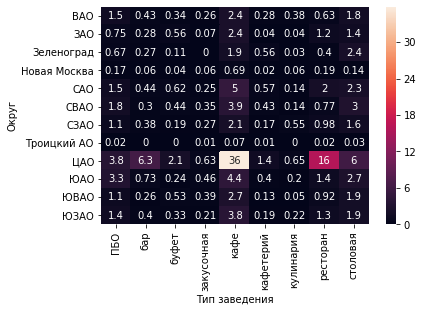

In [39]:
s = sns.heatmap(heatmap_pivot, annot=True)
print('Количество заведений определенного типа на квадратный километр округа')
plt.show()

По тепловой карте видно, что ЦАО переполнен заведениями типа кафе - в среднем 36 кафе на каждый квадратный километр ЦАО.

### 3. Выводы
<a id='Выводы '></a>
 Большая часть заведений общественного питания относится к типу "кафе". Далее идут "столовая", "ресторан", "предприятие быстрого обслуживания".
 Несетевых заведений в 4.18 раза больше, чем сетевых.
 Чаще всего сетевыми являются предприятия быстрого обслуживания и магазин(отдел кулинария). Реже всего - столовая, буфет и бар (доля сетевых заведений не превышает 5%.
 Медиана количества посадочных мест во всех типах сетевых заведений 43.5
Квантили распределения посадочных мест во всех типах сетевых заведений: 
- 25% - до 20 посадочных мест,
- 75% - до 84 мест,
- 95% - до 160 мест

Для сетевых заведений характерно разное количество заведений (95% заведений имеют до 16 заведений в сети). Медиана количества посадочных мест во всех типах сетевых заведений 43.5 При этом если рассматривать сетевые кафе, то разброс значений будет меньше. Если взять сетевые кафе, принадлежащие большим сетям, то среднее количество заведений в сети равно 44.4, количество мест - 40. Сетевые кафе маленьких сетей имеют тоже количество посадочных мест в среднем, но среднее количество заведений составляет 2.9.

Медиана количества посадочных мест в заведениях типа кафе 40.0
Среднее количество заведений типа кафе в большой сети 44.4
Среднее количество заведений типа кафе в сети 2.9

В среднем больше всего мест для посетителей отведено в столовых (среднее количество мест - 130). А меньше всего - в закусочных и магазинах (отдел кулинарии) - среднее количествво мест 8 и 6 соответственно.

В топ-10 по количеству заведений попали не простые улицы:

- Варшавское шоссе - прямое шоссе с наибольшей протяженностью, которое раскинулась на 22,5 км и имеет важное транспортное значение. Шоссе проходит через 8 районов, размещенных в трех административных округах.
- Ленинский проспект состоит из большой Калужской улицы, частично из одноименного шоссе и Киевского шоссе. Месторасположение объекта охватывает 4 округа (Западный, Южный, Западно-Южный и Центральный). Берет свое начало автомагистраль от Калужской площади, заканчивается возле МКАД и имеет протяженность 14 км, ширину от 108 до 120 м. Это единственная в столице России радиальная автомагистраль, не меняющая название на всей дистанции.
- Ленинградский проспект (Ленинградка) размещается в Северном административном округе, держит первенство в статусе самой широкой улицы Москвы (120м)
- Проспект Мира одна из самых протяженных и оживленных улиц города Москвы.
- Профсоюзная улица является одной из главных магистралей юго-запада Москвы. От метро Коньково до пересечения с улицей Академика Капицы она также выступает в качестве границы между районами Коньково и Тёплый Стан.
- Пресненская набережная проходит вдоль делового центра Москва-Сити - крупный развивающийся деловой район в Москве.

Каждая улица проходит через несколько районов и административных округов, это улицы с большой проходимостью (людей и транспорта) вполне логично, что на них собираются заведения общественного питания. При этом в основном это не улицы ЦАО (исключая Пресненскую набережную, но она обособлена за счет Москва-Сити).

Всего в данных 640 улиц, на которых есть всего лишь 1 заведение общественного питания
По одному объекту общественного питания находятся на улицах многих районов и округов. Лидируют районы ЦАО. Предпологаю две причины такого состояния:

- дорогая арендная плата
- короткие улицы, для центра Москвы, особенно старый город и улицы вокруг Кремля - короткие, с узкими тротуарами. Нет возможности расширить помещения за счет улицы или перепланировки здания. Плюс здания в центре Москвы не подлежат перепланировке и накладывается ряд ограничений на использование наружной рекламы - реклама не может нарушать внешний вид города. Поэтому же в центре больше всего кафе - эти предприятия не требуют больших помещений (нет необходимости в полноценной кухне), могут существовать с маленьким количеством посадочных мест, основным товаром является кофе, в том числе кофе на вынос - что удобно для районов с офисами. (Перед рабочим днем зайти и выпить кофе, или взять кофе с собой в офис)

 Большинство заведений, расположенных на топ-20 улиц имеют не более 300 посадочных мест. 90% имеют не более 150 посадочных мест, а медиана проходит через 40 посадочных мест. Так же на этих улицах зарегистрировано 104 заведения вообще без посадочных мест. (такие как сеть Милти, которые занимаются только доставкой еды и не имеют своих залов, а так же палатки с шаурмой и кофе на вынос)
  

### Рекомендации
В данном выводе много предположений, поскольку не указаны подробности для планируемого помещения, функционал роботов (стоять на месте или перемещаться по залу) и место, где хотят открыть кафе. На данном этапе можно сделать следующие выводы:
- не планировать большую сеть, поскольку составить сразу конкуренцию сетевым гигантам не получится
- центр Москвы завален кафе разных типов, не самое лучшее место для начала
- если кафе с роботами предполагает быстрое обслуживание с небольшим залом - можно рассматривать такие места, как Пресненская набережная - рядом с бизнес-центрами, ТЦ или выставочными залами. Здесь спрос на кофе никогда не спадет.
- если есть необходимость в больших залах для посетителей, стоит обратить внимание на СВАО и ЗАО. И рассмотреть другой тип заведения - например, ресторан с банкетным залом. 
- особенность кафе - официанты-роботы - можно обыграть в соответствующей среде - например, расположиться рядом с Робостанцией на ВВЦ (СВАО) или Интерактивным музеем «Восстание машин» (ЮВАО)
